In [80]:
using CSV, DataFrames
df = CSV.read("/users/maurizio/WiSARDpy/datasets/biomat.csv", DataFrames.DataFrame)
#df = dforig[!, r"ACH-"]
first(df, 5)

Row,name,Node2Vec_1,Node2Vec_2,Node2Vec_3,Node2Vec_4,Node2Vec_5,Node2Vec_6,Node2Vec_7,Node2Vec_8,Node2Vec_9,Node2Vec_10,Node2Vec_11,Node2Vec_12,Node2Vec_13,Node2Vec_14,Node2Vec_15,Node2Vec_16,Node2Vec_17,Node2Vec_18,Node2Vec_19,Node2Vec_20,Node2Vec_21,Node2Vec_22,Node2Vec_23,Node2Vec_24,Node2Vec_25,Node2Vec_26,Node2Vec_27,Node2Vec_28,Node2Vec_29,Node2Vec_30,Node2Vec_31,Node2Vec_32,Node2Vec_33,Node2Vec_34,Node2Vec_35,Node2Vec_36,Node2Vec_37,Node2Vec_38,Node2Vec_39,Node2Vec_40,Node2Vec_41,Node2Vec_42,Node2Vec_43,Node2Vec_44,Node2Vec_45,Node2Vec_46,Node2Vec_47,Node2Vec_48,Node2Vec_49,Node2Vec_50,Node2Vec_51,Node2Vec_52,Node2Vec_53,Node2Vec_54,Node2Vec_55,Node2Vec_56,Node2Vec_57,Node2Vec_58,Node2Vec_59,Node2Vec_60,Node2Vec_61,Node2Vec_62,Node2Vec_63,Node2Vec_64,Node2Vec_65,Node2Vec_66,Node2Vec_67,Node2Vec_68,Node2Vec_69,Node2Vec_70,Node2Vec_71,Node2Vec_72,Node2Vec_73,Node2Vec_74,Node2Vec_75,Node2Vec_76,Node2Vec_77,Node2Vec_78,Node2Vec_79,Node2Vec_80,Node2Vec_81,Node2Vec_82,Node2Vec_83,Node2Vec_84,Node2Vec_85,Node2Vec_86,Node2Vec_87,Node2Vec_88,Node2Vec_89,Node2Vec_90,Node2Vec_91,Node2Vec_92,Node2Vec_93,Node2Vec_94,Node2Vec_95,Node2Vec_96,Node2Vec_97,Node2Vec_98,Node2Vec_99,⋯
,String15,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,⋯
1,MAP2K4,0.189205,-0.68293,0.526686,0.530565,0.337738,0.158541,-0.61182,-0.179419,-0.487556,-0.588995,0.316862,-0.186161,0.953035,-0.191762,0.667909,-0.878786,1.11255,-1.9161,0.108616,0.543769,1.372,-0.635055,0.381461,-0.690444,0.428544,-0.417968,-0.785325,0.125506,1.22756,0.41267,-1.16139,0.686168,-0.749244,0.488446,0.0868987,1.11709,0.48086,0.45775,0.199361,0.0860427,-1.34009,0.0209451,-0.480095,-0.102226,-0.363324,-0.304285,-1.25974,0.142727,0.642507,-0.405637,-0.0613079,-1.26206,-0.175068,-0.109698,0.379713,0.332199,0.0195103,-0.646401,0.280324,-0.989026,-0.0796812,0.0685346,0.276302,-0.409912,0.571651,0.308739,-0.152541,0.342222,-0.223185,-0.123936,-0.0759081,0.589428,-0.147184,0.545456,0.947259,-0.529752,0.0770038,0.108345,0.0919829,0.0644964,0.177092,0.339457,1.03335,0.145268,-0.264464,0.229575,-0.31037,0.129321,0.134353,0.674063,-0.179937,0.605418,-0.257646,0.196237,0.594952,0.589647,0.0102707,0.171264,0.105263,⋯
2,FLNC,-0.168315,-0.495042,-0.140764,-0.582063,0.230374,-0.777822,0.737297,0.367289,0.906827,0.201151,0.206377,-0.477604,1.18247,-0.408967,-0.159665,0.547547,-0.264234,0.63784,-0.678294,1.17608,-0.893941,0.157238,0.848197,0.553791,0.133877,-0.708604,-0.691762,0.713529,0.873177,1.19751,-1.16895,-0.131154,-0.486488,0.055266,0.0424341,-0.0549877,0.811284,1.20957,-0.211684,0.208705,1.01486,1.02515,-0.201336,-0.316125,-0.258997,0.606743,0.589007,0.531445,-0.25253,0.248752,-0.0875328,-0.932249,-0.807341,0.648288,1.29843,0.396672,0.495993,1.38979,-0.248421,-0.23791,-0.544904,0.788928,-0.648762,-1.3525,-0.230475,0.44352,-0.479567,-1.166,0.798587,0.782334,-0.3818,-0.0640857,-0.630913,0.439835,-0.160288,0.100363,-0.290371,-0.0161768,-0.996471,0.187841,0.419468,0.849631,0.00967577,1.09287,1.08931,0.519229,-0.750832,-0.801355,-0.0594564,-0.60421,0.702212,0.835787,0.293064,0.157428,0.977749,0.30536,0.869763,0.863057,-0.511577,⋯
3,FNTA,0.0296064,0.230097,-0.623636,0.204871,-0.564605,1.53592,0.346013,-0.213729,1.05993,-0.895751,0.909709,0.529381,1.38822,0.0626246,-0.196

In [81]:
foo(x) = x < -1.056 ? "E" : (x < -0.508 ? "aE" : (x < -0.01 ? "aNE" : "NE"))
dfl = foo.(df[!, r"ACH-"])
first(dfl, 5)

Row,ACH-000096,ACH-000159,ACH-000189,ACH-000234,ACH-000246,ACH-000250,ACH-000262,ACH-000272,ACH-000313,ACH-000317,ACH-000375,ACH-000385,ACH-000411,ACH-000433,ACH-000459,ACH-000484,ACH-000495,ACH-000600,ACH-000649,ACH-000684,ACH-000709,ACH-000792,ACH-000907,ACH-001163,ACH-001194,ACH-001310,ACH-001398,ACH-001532,ACH-001687,ACH-001688,ACH-002150,ACH-002189
,String,String,String,String,String,String,String,String,String,String,String,String,String,String,String,String,String,String,String,String,String,String,String,String,String,String,String,String,String,String,String,String
1,NE,aNE,aNE,NE,NE,aNE,aNE,NE,aNE,aNE,NE,aNE,NE,NE,aNE,aNE,NE,NE,NE,NE,aNE,NE,aNE,aNE,NE,NE,aNE,aNE,NE,aNE,aNE,NE
2,aNE,aNE,aNE,aNE,aNE,aNE,aNE,aNE,NE,aNE,aNE,aNE,NE,aNE,aNE,NE,aNE,aNE,NE,aNE,NE,aNE,aNE,NE,aNE,aNE,aNE,NE,aNE,aNE,NE,aNE
3,E,E,E,E,aE,aE,E,aE,aE,E,E,E,E,E,aE,aE,E,aE,aE,E,aE,E,E,aE,E,E,aE,E,E,E,aE,aE
4,aNE,aNE,NE,aNE,NE,NE,NE,NE,NE,aNE,NE,NE,NE,aNE,NE,NE,aNE,NE,aNE,NE,NE,aNE,aNE,NE,NE,aNE,NE,NE,NE,aNE,aNE,NE
5,NE,NE,NE,NE,NE,aNE,aNE,NE,aNE,aNE,NE,aNE,NE,aNE,aNE,aNE,aNE,NE,aNE,NE,NE,aNE,aNE,NE,aNE,NE,NE,NE,aNE,NE,NE,NE
6,NE,NE,NE,aNE,NE,NE,NE,NE,NE,NE,NE,aNE,NE,NE,NE,NE,NE,NE,NE,NE,NE,aNE,NE,NE,NE,NE,NE,NE,NE,aNE,NE,NE
7,E,E,E,E,E,E,E,E,E,E,E,E,E,E,E,E,E,E,E,E,E,E,E,E,E,E,E,E,E,E,E,E
8,aNE,NE,aNE,NE,NE,aNE,aNE,aNE,aNE,NE,NE,aNE,aNE,NE,aNE,NE,aNE,aNE,aNE,NE,aNE,aNE,NE,NE,aNE,aNE,aNE,aNE,NE,NE,NE,aNE
9,aNE,aNE,aE,aE,aE,aNE,aE,aE,aE,aNE,aNE,aNE,aE,aNE,aNE,aNE,aNE,aNE,aNE,aE,aE,aE,aNE,aNE,aNE,aE,aNE,aNE,aNE,aNE,aE,aE


In [82]:
using Plots
using DataStructures
df[!, :dist] = [Dict(counter(x)) for x in eachrow(Array(dfl))]

16751-element Vector{Dict{String, Int64}}:
 Dict("aNE" => 16, "NE" => 16)
 Dict("aNE" => 24, "NE" => 8)
 Dict("E" => 19, "aE" => 13)
 Dict("aNE" => 12, "NE" => 20)
 Dict("aNE" => 14, "NE" => 18)
 Dict("aNE" => 4, "NE" => 28)
 Dict("E" => 32)
 Dict("aNE" => 19, "NE" => 13)
 Dict("aNE" => 19, "aE" => 13)
 Dict("aNE" => 26, "NE" => 6)
 Dict("aNE" => 15, "NE" => 17)
 Dict("aNE" => 31, "NE" => 1)
 Dict("aNE" => 8, "NE" => 24)
 ⋮
 Dict("aNE" => 8, "NE" => 24)
 Dict("aNE" => 31, "NE" => 1)
 Dict("aNE" => 12, "NE" => 20)
 Dict("aNE" => 2, "NE" => 30)
 Dict("aNE" => 7, "NE" => 25)
 Dict("aNE" => 2, "NE" => 30)
 Dict("aNE" => 5, "NE" => 27)
 Dict("aNE" => 27, "NE" => 5)
 Dict("aNE" => 13, "NE" => 19)
 Dict("aNE" => 15, "NE" => 17)
 Dict("aNE" => 7, "NE" => 25)
 Dict("aNE" => 22, "NE" => 10)

In [92]:
reps1(x) = "E" in keys(x) ? x["E"] : 0
reps2(x) = "aE" in keys(x) ? x["aE"] : 0
reps3(x) = "aNE" in keys(x) ? x["aNE"] : 0
reps4(x) = "NE" in keys(x) ? x["NE"] : 0
df[!, :freq_E] = reps1.(df[!, :dist])
df[!, :freq_aE] = reps2.(df[!, :dist])
df[!, :freq_aNE] = reps3.(df[!, :dist])
df[!, :freq_NE] = reps4.(df[!, :dist])
keymx(x) =  findmax(x)[2]
df[!, :MGlabel] = keymx.(df[!, :dist])
first(df[!, :MGlabel], 5)

5-element Vector{String}:
 "aNE"
 "aNE"
 "E"
 "NE"
 "NE"

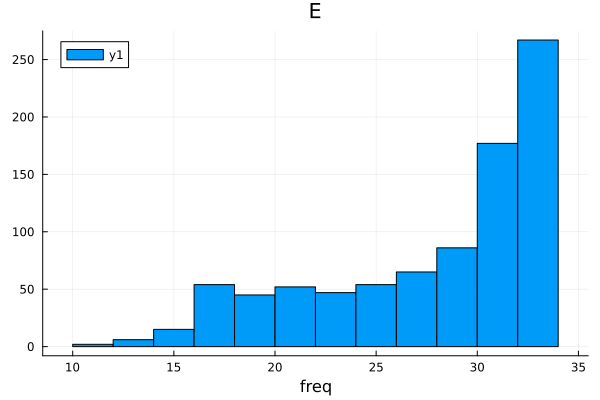

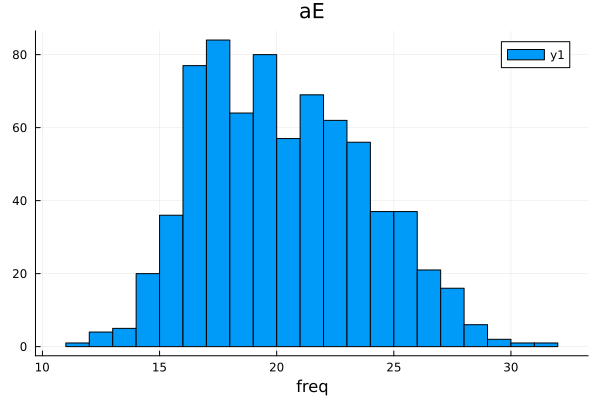

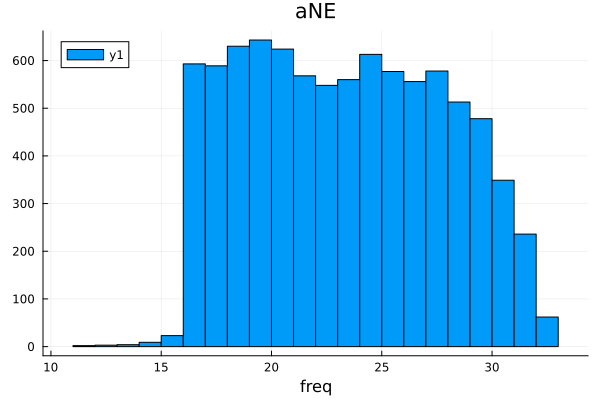

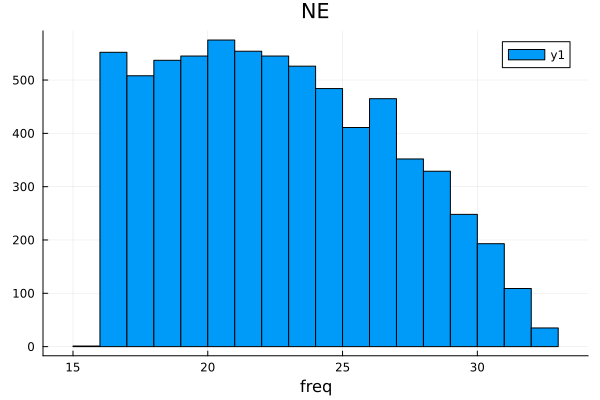

In [86]:
for c in ["E" "aE" "aNE" "NE"]
    dftmp = filter(row -> row["freq_$c"] == max(row.freq_E, row.freq_aE, row.freq_aNE, row.freq_NE), df)
    display(plot(xlabel = "freq", title=c,histogram.(eachcol(dftmp[!, "freq_$c"])) ...))
end

In [115]:
threshold = 18
dftmp = DataFrame()
for c in ["E" "aE" "aNE" "NE"]
    dftmp = vcat(dftmp, filter(row -> row["freq_$c"] == max(row.freq_E, row.freq_aE, row.freq_aNE, row.freq_NE) & row["freq_$c"] >= threshold, df))
    println("$c rows: ", nrow(dftmp), "/", nrow(df))
end
CSV.write("biomat_remastered.csv",dftmp[!, Not(r"ACH-|freq_|dist|^label")]) 
X = Array(dftmp[!, Not(r"ACH-|freq_|dist|label|^name")])
y = Array(DataFrames.select(dftmp, [:MGlabel]))

E rows: 793/16751
aE rows: 1302/16751
aNE rows: 8837/16751
NE rows: 14745/16751


14745×1 Matrix{String}:
 "E"
 "E"
 "E"
 "E"
 "E"
 "E"
 "E"
 "E"
 "E"
 "E"
 "E"
 "E"
 "E"
 ⋮
 "NE"
 "NE"
 "NE"
 "NE"
 "NE"
 "NE"
 "NE"
 "NE"
 "NE"
 "NE"
 "NE"
 "NE"

In [113]:
import Pkg; Pkg.add("LightGBM")
using MLJ
using LightGBM
train, test = MLJ.partition(eachindex(y), 0.8, shuffle=true, rng=1)
booster = LightGBM.LGBMClassification(;
    objective="multiclass", 
    metric=["average_accuracy"], 
    num_leaves=1000, 
    learning_rate=0.2, 
    max_bin=255, 
    max_depth=10, 
    min_data_in_leaf=50, 
    num_iterations=5, 
    num_class=1, 
    use_missing=true, 
    min_sum_hessian_in_leaf=1.
)

LightGBM.fit!(booster, X[train,:], y[train], num_classes = size(unique(y), 1))
ŷ = LightGBM.predict(booster, X[test,:])
ŷ = replace(x->x>=0.5 ? 1.0 : 0.0, ŷ)
accuracy = sum(ŷ .== y[test]) / length(y[test])
println("accuracy: $accuracy")
ConfusionMatrix()(vec(ŷ), coerce(vec(y[test]), OrderedFactor)) 

   Resolving package versions...
  No Changes to `~/WiSARDj/Project.toml`
  No Changes to `~/WiSARDj/Manifest.toml`


LoadError: MethodError: no method matching fit!(::LGBMClassification, ::Matrix{Float64}, ::Vector{String}; num_classes=4)
[0mClosest candidates are:
[0m  fit!(::LGBMEstimator, ::AbstractMatrix{TX}, [91m::Vector{Ty}[39m, [91m::Tuple{AbstractMatrix{TX}, Vector{Ty}}...[39m; verbosity, is_row_major, weights, init_score, truncate_booster) where {TX<:Real, Ty<:Real} at ~/.julia/packages/LightGBM/3367V/src/fit.jl:35[91m got unsupported keyword argument "num_classes"[39m
[0m  fit!(::LGBMEstimator, [91m::LightGBM.Dataset[39m, [91m::LightGBM.Dataset...[39m; verbosity, truncate_booster) at ~/.julia/packages/LightGBM/3367V/src/fit.jl:70[91m got unsupported keyword argument "num_classes"[39m